# Proyek Analisis Data: Bike sharing dataset
- **Nama:**
- **Email:**
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Bagaimana suhu memengaruhi jumlah total penyewaan harian?
- Bagaimana tren penyewaan per jam di hari biasa?

## Import Semua Packages/Library yang Digunakan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Disini saya memuat table **day_df**,
yang dimana tabel ini berisi data penyewaan tiap hari saya ambil contoh dengan sample sebanyak 15

In [7]:
day_df = pd.read_csv("sample_data/day.csv")
day_df.sample(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
218,219,2011-08-07,3,0,8,0,0,0,1,0.742500,0.715292,0.752917,0.201487,1298,2487,3785
357,358,2011-12-24,1,0,12,0,6,0,1,0.302500,0.299242,0.542500,0.190304,155,856,1011
111,112,2011-04-22,2,0,4,0,5,1,2,0.336667,0.321954,0.729583,0.219521,177,1506,1683
338,339,2011-12-05,4,0,12,0,1,1,2,0.385833,0.393925,0.827083,0.062208,233,3578,3811
318,319,2011-11-15,4,0,11,0,2,1,2,0.530000,0.507579,0.688750,0.199633,449,3746,4195
209,210,2011-07-29,3,0,7,0,5,1,1,0.838333,0.785967,0.542500,0.174138,670,3176,3846
265,266,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.972500,0.078367,258,2137,2395
108,109,2011-04-19,2,0,4,0,2,1,2,0.505833,0.489258,0.665833,0.157971,409,2795,3204
299,300,2011-10-27,4,0,10,0,4,1,2,0.470000,0.457046,0.812917,0.197763,240,2419,2659
536,537,2012-06-20,2,1,6,0,3,1,1,0.782500,0.720975,0.592083,0.113812,872,5339,6211


Sama seperti diatas saya juga memuat tabel **hour_df**, yang dimana tabel ini berisi data penyewaan perjam saya ambil contoh dengan sample sebanyak 15

In [8]:
hour_df = pd.read_csv("sample_data/hour.csv")
hour_df.sample(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13848,13849,2012-08-05,3,1,8,5,0,0,0,1,0.72,0.6970,0.74,0.2537,1,18,19
13293,13294,2012-07-13,3,1,7,2,0,5,1,2,0.66,0.6212,0.61,0.0896,2,15,17
16217,16218,2012-11-13,4,1,11,11,0,2,1,1,0.32,0.3030,0.70,0.2537,22,133,155
14001,14002,2012-08-11,3,1,8,14,0,6,0,1,0.80,0.7424,0.49,0.2985,248,290,538
12207,12208,2012-05-28,2,1,5,20,1,1,0,1,0.78,0.7424,0.62,0.2985,114,203,317
101,102,2011-01-05,1,0,1,10,0,3,1,1,0.22,0.1970,0.37,0.3284,4,53,57
617,618,2011-01-28,1,0,1,23,0,5,1,1,0.24,0.2273,0.60,0.2239,1,22,23
16936,16937,2012-12-13,4,1,12,11,0,4,1,1,0.34,0.3182,0.42,0.2537,25,164,189
5850,5851,2011-09-06,3,0,9,6,0,2,1,2,0.54,0.5152,0.88,0.3284,0,72,72
9347,9348,2012-01-30,1,1,1,9,0,1,1,1,0.20,0.1970,0.47,0.2239,5,193,198


**Insight: WAJIB REVISI**
Keterangan: instant: index data; dteday: tanggal; season: musim (1:spring, 2:summer, 3:fall, 4:winter); yr: tahun (1: 2011, 2:2012); mnth: bulan holiday: hari libur (0: bukan hari libur, 1: hari libur); weekday: hari ke- per minggu; workingday: hari kerja (0: akhir pekan atau holiday, 1: hari kerja); weathersit: cuaca (1: cerah/berawan, 2: berkabut, 3: bersalju, 4: cuaca ekstrim); temp: suhu yang terukur dalam Celcius; atemp: suhu yang dirasakan dalam Celcius; hum: humidity/kelembapan; windspeed: kecepatan angin; casual: jumlah pengguna casual yang menyewa sepeda; registered: jumlah pengguna terdaftar yang menyewa sepeda; cnt: total jumlah pengguna yang menyewa sepeda (casual dan registered)

### Assessing Data

Proses asessing data ***day_df***

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
print("Duplikasi = ",day_df.duplicated().sum())
day_df.describe()

Duplikasi =  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


 tipe data ***'dteday'*** bukan datetime melainkan object

---------------------------------------------

Proses asessing data ***hour_df***

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


sama seperti proses asessing data day_df ditemukan tipe data **'dteday'** bukan datetime melainkan object

In [12]:
print("Duplikasi = ",hour_df.duplicated().sum())
day_df.describe()

Duplikasi =  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- pada saat proses asessing data baik **day_df** & **hour_df** masih terdapat data yang miss yang seharusnya tipe data '***dteday***' itu datetime bukan object, nanti akan koreksi diproses selanjutnya yaitu **cleaning data**

### Cleaning Data

Baik disini saya akan melakukan perobahan tipe data **'dteday'** yang sebelumnya object menjadi ***datetime***

In [13]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- baik disini sudah dilakukan koreksi pada tipe data **'dteday'** sehingga datanya sudah akurat untuk kita lanjut eksekusi ke proses EDA

## Exploratory Data Analysis (EDA)

### Explore data day_df & hour_df

Disini saya mencoba untuk mengexplorasi data ***day_df*** terlebih dahulu

In [21]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [22]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]})

instant  cnt                                
           nunique  min   max         mean          std
workingday                                             
0              231  605  8714  4330.168831  2052.141245
1              500   22  8362  4584.820000  1878.415583

In [23]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]})

instant  cnt                                
           nunique  min   max         mean          std
weathersit                                             
1              463  431  8714  4876.786177  1879.483989
2              247  605  8362  4035.862348  1809.109918
3               21   22  4639  1803.285714  1240.284449

lalu saya coba melakukan eksplorasi data ***hour_df***

In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [25]:
hour_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]})

instant cnt                             
           nunique min  max        mean         std
workingday                                         
0             5514   1  783  181.405332  172.853832
1            11865   1  977  193.207754  185.107477

In [26]:

hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]})

instant cnt                             
           nunique min  max        mean         std
weathersit                                         
1            11413   1  977  204.869272  189.487773
2             4544   1  957  175.165493  165.431589
3             1419   1  891  111.579281  133.781045
4                3  23  164   74.333333   77.925178

**Insight:**
- Tujuan pada saat proses explorasi data diatas saya adalah untuk melihat data jumlah penyewa (cnt) berdasarkan workingday & weathersit baik dalam data **day_df** & **hour df**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu memengaruhi jumlah total penyewaan harian?

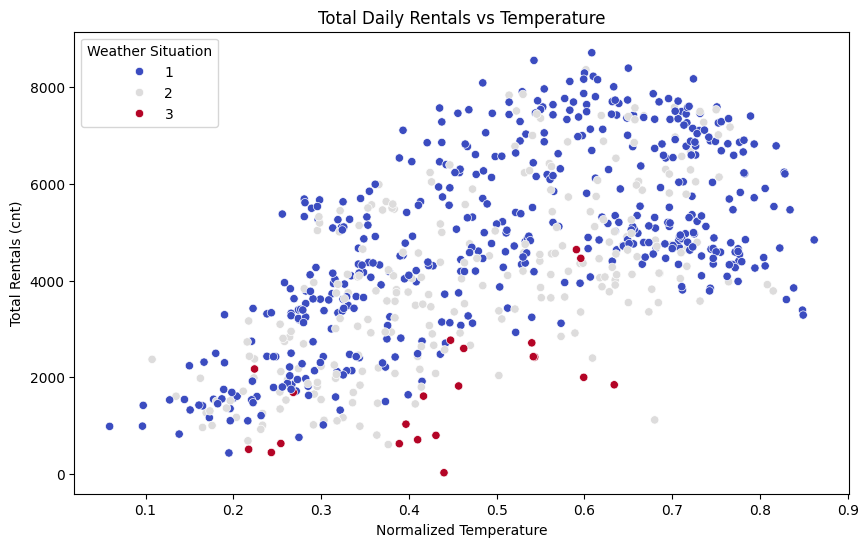

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Baik disini saya memvisualisasikan yang bertujuan untuk menganalisis hubungan antara suhu dan total penyewaan harian
plt.figure(figsize=(10, 6))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], hue=day_df['weathersit'], palette='coolwarm')
plt.title('Total Daily Rentals vs Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals (cnt)')
plt.legend(title='Weather Situation', loc='upper left')
plt.show()

Insight :
Kondisi cuaca yang optimal mendorong penggunaan sepeda, Jumlah penyewaan meningkat seiring dengan meningkatnya suhu, terutama dalam situasi cuaca yang lebih baik. Hal ini menunjukkan bahwa mempromosikan penyewaan sepeda selama cuaca yang baik dapat meningkatkan penggunaan.


***#untuk jawaban dari point 1 saya taruh di bagian Conclusion bawah, terimakasih#***


### Pertanyaan 2: Bagaimana tren penyewaan per jam di hari biasa?

<ipython-input-18-ca9a6ce815d6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], ci=None)


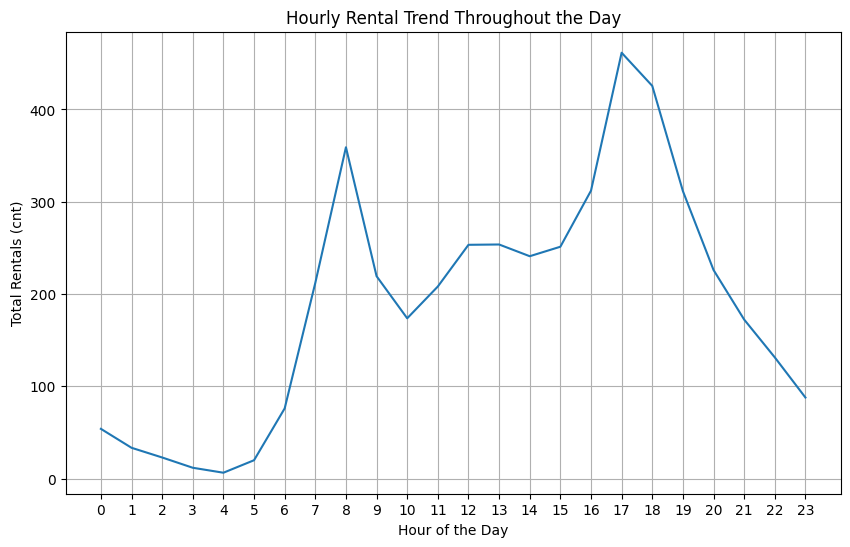

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], ci=None)
plt.title('Hourly Rental Trend Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals (cnt)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Insight :
Promosi yang perlu ditargetkan selama jam-jam tidak sibuk diluar jam (rush hour), Rendahnya aktivitas penyewaan di antara periode puncak memberikan peluang untuk memperkenalkan insentif selama jam-jam di luar jam sibuk, seperti diskon penyewaan, untuk mempertahankan penggunaan yang stabil sepanjang hari.

***#untuk jawaban dari point 2 saya taruh di bagian Conclusion bawah, terimakasih#***

## Analisis Lanjutan (Opsional)

Baik disini saya akan mencoba menambahkan 2 point Analisis Lanjutan yang akan saya lampiran dibawah :

## **Analisis 1 : Pengaruh Hari Kerja dan Hari Libur terhadap Penyewaan**

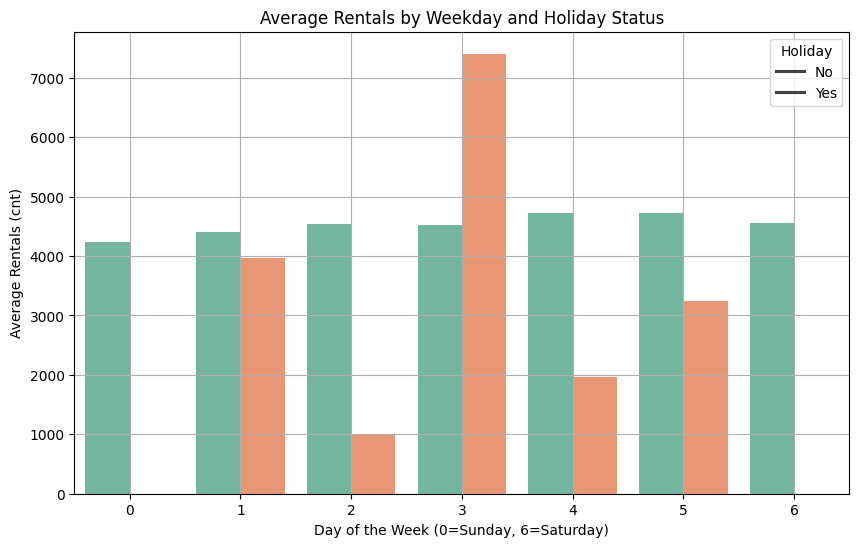

In [19]:
# Group by weekday and holiday to compare average rentals
weekday_holiday_df = day_df.groupby(['weekday', 'holiday']).agg({'cnt': 'mean'}).reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', hue='holiday', data=weekday_holiday_df, palette='Set2')
plt.title('Average Rentals by Weekday and Holiday Status')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Average Rentals (cnt)')
plt.legend(title='Holiday', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

Saya mengelompokkan data berdasarkan hari kerja dan hari libur untuk menghitung
jumlah rata-rata penyewaan.

Kemudian, saya menggunakan bar plot untuk membandingkan jumlah penyewaan di
hari yang berbeda, dan saya juga menganalisa pada hari libur untuk melihat apakah ada perubahan signifikan pada akhir pekan atau hari libur.

## **Analisis 2 : Dampak Musim terhadap Penyewaan**

<ipython-input-20-61255061965d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_df, palette='viridis')


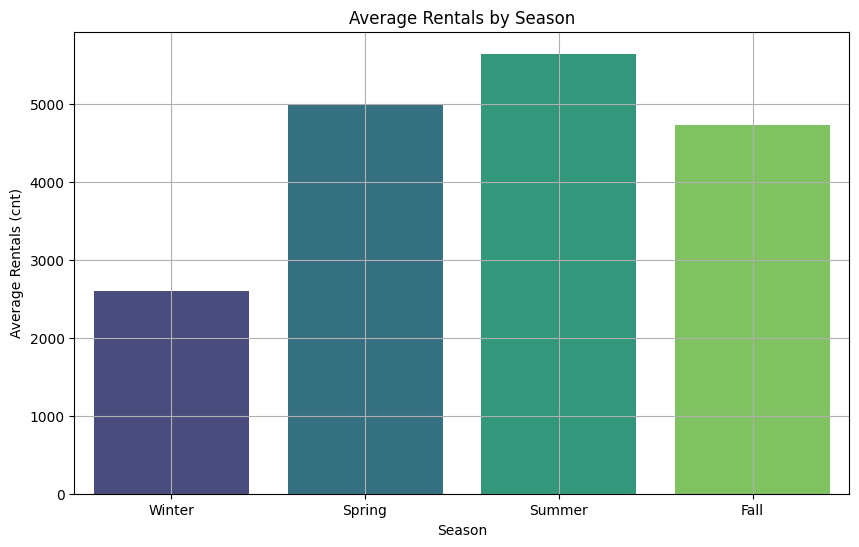

In [20]:
# Group by season and calculate the mean rental count
season_df = day_df.groupby('season').agg({'cnt': 'mean'}).reset_index()

# Mapping season numbers to names for better readability
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
season_df['season'] = season_df['season'].map(season_map)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_df, palette='viridis')
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals (cnt)')
plt.grid(True)
plt.show()

Saya mengelompokkan data berdasarkan musim dan menghitung jumlah rata-rata penyewaan untuk setiap musim.

Musim-musim tersebut kemudian saya mapping sesuai dengan namanya masing-masing, dan bar plot digunakan untuk menunjukkan variasi penyewaan antar musim.

## Conclusion

**Conclusion:**
- ***Point Pertanyaan 1*** : Dampak Suhu terhadap Penyewaan Harian: Plot sebaran menunjukkan korelasi positif antara suhu dan jumlah penyewaan harian. Suhu yang lebih hangat umumnya dikaitkan dengan jumlah penyewaan sepeda yang lebih tinggi, yang mengindikasikan bahwa orang lebih memilih untuk menggunakan sepeda dalam kondisi cuaca yang mendukung.
---
- ***Point Pertanyaan 2*** : Tren Penyewaan per Jam: Plot garis data per jam menunjukkan dua periode puncak penyewaan: pagi (sekitar jam 8-9 pagi) dan sore (jam 5-7 sore), yang sesuai dengan waktu perjalanan yang umum. Hal ini menunjukkan bahwa penyewaan sepeda terutama digunakan untuk perjalanan ke kantor.